In [1]:
!pip install mlrose_hiive
!pip install mlrose

In [2]:
!pip install six

In [3]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [4]:
import matplotlib.pyplot as plt
import mlrose_hiive
import mlrose
import pandas as pd
import time

Six Peaks

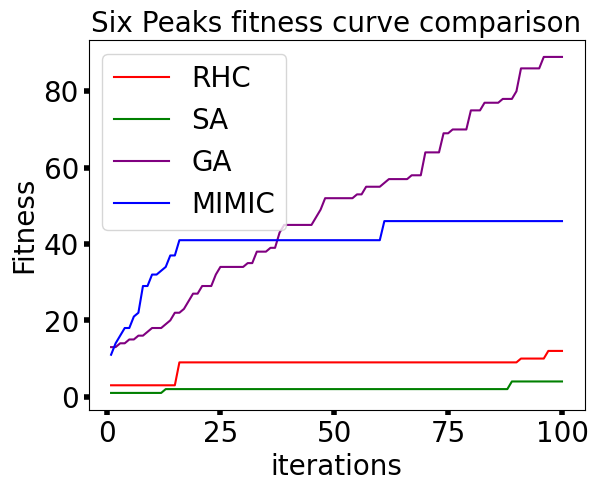

In [54]:
fitness=mlrose_hiive.SixPeaks(t_pct=0.5)
problem=mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)
algorithms=['rhc','sa','ga','mimic']
time_duration=[]
SP_rhc_start_time=time.time()
SP_rhc_best_state, SP_rhc_best_fitness, SP_rhc_fitness_curve=mlrose_hiive.random_hill_climb(problem, max_attempts=100, max_iters=100, curve=True, random_state=42, restarts=75)
SP_rhc_end_time=time.time()
SP_rhc_duration=SP_rhc_end_time-SP_rhc_start_time
SP_rhc_fitness_curve=SP_rhc_fitness_curve[:,0]
time_duration.append(SP_rhc_duration)



SP_sa_start_time=time.time()
SP_sa_best_state, SP_sa_best_fitness, SP_sa_fitness_curve=mlrose_hiive.simulated_annealing(problem, schedule=mlrose.GeomDecay(init_temp=10, decay=0.001,min_temp=0.01), max_attempts=100, max_iters=100, curve=True, random_state=42)
SP_sa_end_time=time.time()
SP_sa_duration=SP_sa_end_time-SP_sa_start_time
SP_sa_fitness_curve=SP_sa_fitness_curve[:,0]
time_duration.append(SP_sa_duration)

SP_ga_start_time=time.time()
SP_ga_best_state, SP_ga_best_fitness, SP_ga_fitness_curve=mlrose_hiive.genetic_alg(problem, pop_size=400,mutation_prob=0.3, max_attempts=100, max_iters=100, curve=True, random_state=42)
SP_ga_end_time=time.time()
SP_ga_duration=SP_ga_end_time-SP_ga_start_time
SP_ga_fitness_curve=SP_ga_fitness_curve[:,0]
time_duration.append(SP_ga_duration)

SP_mimic_start_time=time.time()
SP_mimic_best_state, SP_mimic_best_fitness, SP_mimic_fitness_curve=mlrose_hiive.mimic(problem,  max_attempts=100, max_iters=100, curve=True, random_state=42, pop_size=500)
SP_mimic_end_time=time.time()
SP_mimic_duration=SP_mimic_end_time-SP_mimic_start_time
SP_mimic_fitness_curve=SP_mimic_fitness_curve[:,0]
time_duration.append(SP_mimic_duration)


iterations=range(1,101)
plt.plot(iterations, SP_rhc_fitness_curve, color="red", label="RHC")
plt.plot(iterations, SP_sa_fitness_curve, color="Green", label="SA")
plt.plot(iterations, SP_ga_fitness_curve, color="Purple", label="GA")
plt.plot(iterations, SP_mimic_fitness_curve, color="Blue", label="MIMIC")
plt.legend(fontsize=20)
plt.title("Six Peaks fitness curve comparison",fontsize=20)
plt.xlabel("iterations", fontsize=20)
plt.ylabel("Fitness",fontsize=20)
plt.tick_params(labelsize=20, width=4)

plt.show()

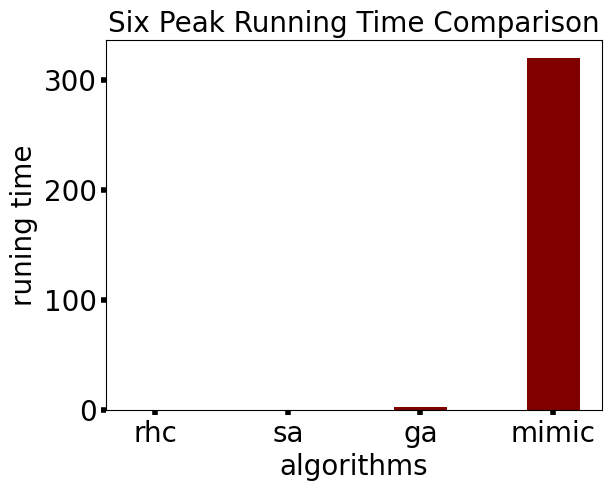

In [25]:
plt.bar(algorithms,time_duration, color='maroon', width=0.4)
plt.xlabel("algorithms", fontsize=20)
plt.ylabel("runing time",fontsize=20)
plt.title("Six Peak Running Time Comparison", fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.show()

Continuous Peak

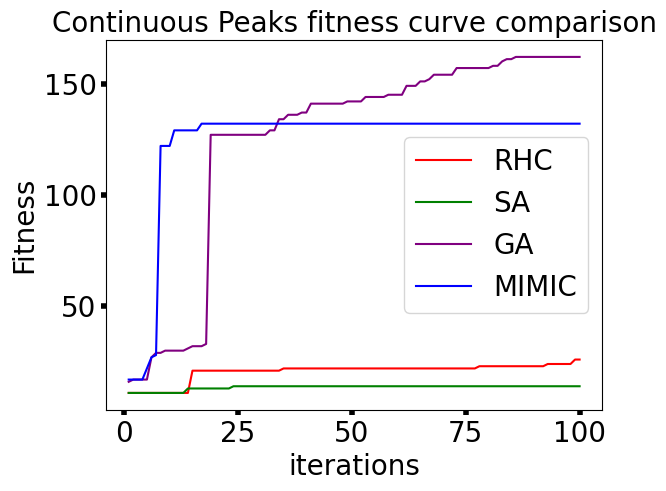

In [26]:
fitness=mlrose_hiive.ContinuousPeaks(t_pct=0.2)
problem=mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)
algorithms=['rhc','sa','ga','mimic']
time_duration=[]
cp_rhc_start_time=time.time()
cp_rhc_best_state, cp_rhc_best_fitness, cp_rhc_fitness_curve=mlrose_hiive.random_hill_climb(problem, max_attempts=100, max_iters=100, curve=True, random_state=42, restarts=25)
cp_rhc_end_time=time.time()
cp_rhc_duration=cp_rhc_end_time-cp_rhc_start_time
cp_rhc_fitness_curve=cp_rhc_fitness_curve[:,0]
time_duration.append(cp_rhc_duration)

cp_sa_start_time=time.time()
cp_sa_best_state, cp_sa_best_fitness, cp_sa_fitness_curve=mlrose_hiive.simulated_annealing(problem, schedule=mlrose.GeomDecay(init_temp=10, decay=0.5,min_temp=0.01), max_attempts=100, max_iters=100, curve=True, random_state=42)
cp_sa_end_time=time.time()
cp_sa_duration=cp_sa_end_time-cp_sa_start_time
cp_sa_fitness_curve=cp_sa_fitness_curve[:,0]
time_duration.append(cp_sa_duration)

cp_ga_start_time=time.time()
cp_ga_best_state, cp_ga_best_fitness, cp_ga_fitness_curve=mlrose_hiive.genetic_alg(problem,  max_attempts=100, max_iters=100, curve=True, random_state=42, pop_size=250,mutation_prob=0.1)
cp_ga_end_time=time.time()
cp_ga_duration=cp_ga_end_time-cp_ga_start_time
cp_ga_fitness_curve=cp_ga_fitness_curve[:,0]
time_duration.append(cp_ga_duration)

cp_mimic_start_time=time.time()
cp_mimic_best_state, cp_mimic_best_fitness, cp_mimic_fitness_curve=mlrose_hiive.mimic(problem, max_attempts=100, max_iters=100, curve=True, random_state=42, pop_size=300)
cp_mimic_end_time=time.time()
cp_mimic_duration=cp_mimic_end_time-cp_mimic_start_time
cp_mimic_fitness_curve=cp_mimic_fitness_curve[:,0]
time_duration.append(cp_mimic_duration)

iterations=range(1,101)
plt.plot(iterations, cp_rhc_fitness_curve, color="red", label="RHC")
plt.plot(iterations, cp_sa_fitness_curve, color="Green", label="SA")
plt.plot(iterations, cp_ga_fitness_curve, color="Purple", label="GA")
plt.plot(iterations, cp_mimic_fitness_curve, color="Blue", label="MIMIC")
plt.legend(fontsize=20)
plt.title("Continuous Peaks fitness curve comparison",fontsize=20)
plt.xlabel("iterations",fontsize=20)
plt.ylabel("Fitness",fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.show()

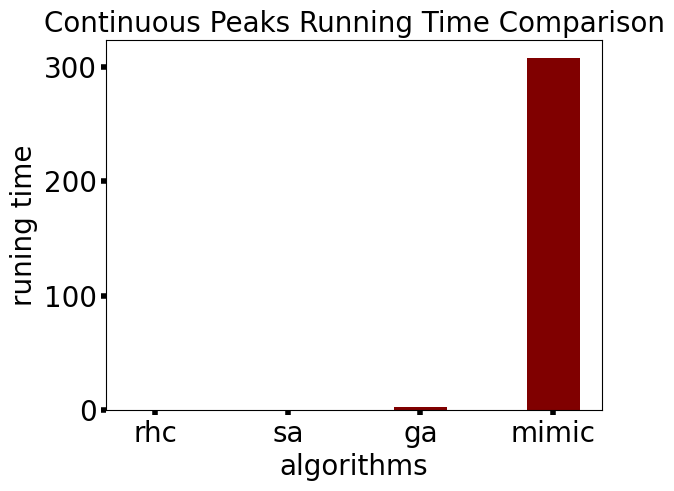

In [27]:
plt.bar(algorithms,time_duration, color='maroon', width=0.4)
plt.xlabel("algorithms", fontsize=20)
plt.ylabel("runing time",fontsize=20)
plt.title("Continuous Peaks Running Time Comparison", fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.show()

One Max

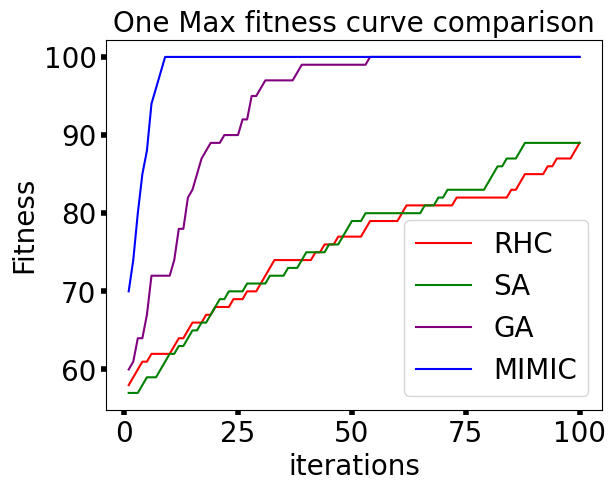

In [22]:

fitness=mlrose_hiive.OneMax()
problem=mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)
time_duration=[]
OM_rhc_start_time=time.time()
OM_rhc_best_state, OM_rhc_best_fitness, OM_rhc_fitness_curve=mlrose_hiive.random_hill_climb(problem, max_attempts=100, max_iters=100, curve=True, random_state=42, restarts=100)
OM_rhc_end_time=time.time()
OM_rhc_duration=OM_rhc_end_time-OM_rhc_start_time
OM_rhc_fitness_curve=OM_rhc_fitness_curve[:,0]
time_duration.append(OM_rhc_duration)

OM_sa_start_time=time.time()
OM_sa_best_state, OM_sa_best_fitness, OM_sa_fitness_curve=mlrose_hiive.simulated_annealing(problem, schedule=mlrose.GeomDecay(init_temp=10, decay=0.1,min_temp=0.001), max_attempts=100, max_iters=100, curve=True, random_state=42)
OM_sa_end_time=time.time()
OM_sa_duration=OM_sa_end_time-OM_sa_start_time
OM_sa_fitness_curve=OM_sa_fitness_curve[:,0]
time_duration.append(OM_sa_duration)

OM_ga_start_time=time.time()
OM_ga_best_state, OM_ga_best_fitness, OM_ga_fitness_curve=mlrose_hiive.genetic_alg(problem,  max_attempts=100, max_iters=100, curve=True, random_state=42, pop_size=50, mutation_prob=0.1)
OM_ga_end_time=time.time()
OM_ga_duration=OM_ga_end_time-OM_ga_start_time
OM_ga_fitness_curve=OM_ga_fitness_curve[:,0]
time_duration.append(OM_ga_duration)

OM_mimic_start_time=time.time()
OM_mimic_best_state, OM_mimic_best_fitness, OM_mimic_fitness_curve=mlrose_hiive.mimic(problem, max_attempts=100, max_iters=100, curve=True, random_state=42, pop_size=200)
OM_mimic_end_time=time.time()
OM_mimic_duration=OM_mimic_end_time-OM_mimic_start_time
OM_mimic_fitness_curve=OM_mimic_fitness_curve[:,0]
time_duration.append(OM_mimic_duration)

iterations=range(1,101)
plt.plot(iterations, OM_rhc_fitness_curve, color="red", label="RHC")
plt.plot(iterations, OM_sa_fitness_curve, color="Green", label="SA")
plt.plot(iterations, OM_ga_fitness_curve, color="Purple", label="GA")
plt.plot(iterations, OM_mimic_fitness_curve, color="Blue", label="MIMIC")
plt.legend(fontsize=20)
plt.title("One Max fitness curve comparison",fontsize=20)
plt.xlabel("iterations", fontsize=20)
plt.ylabel("Fitness",fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.show()
    

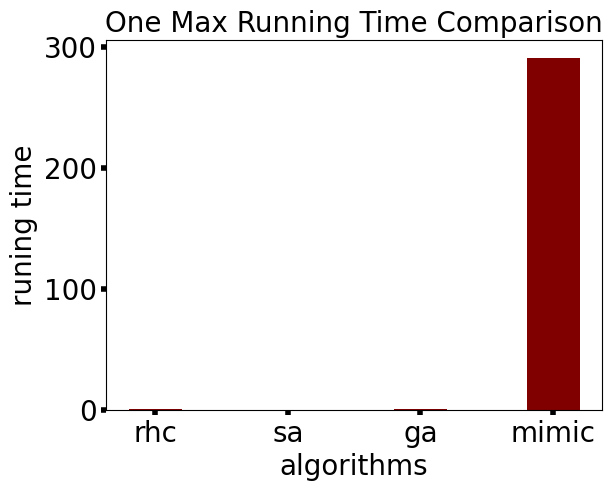

In [29]:
plt.bar(algorithms,time_duration, color='maroon', width=0.4)
plt.xlabel("algorithms", fontsize=20)
plt.ylabel("runing time",fontsize=20)
plt.title("One Max Running Time Comparison", fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.show()

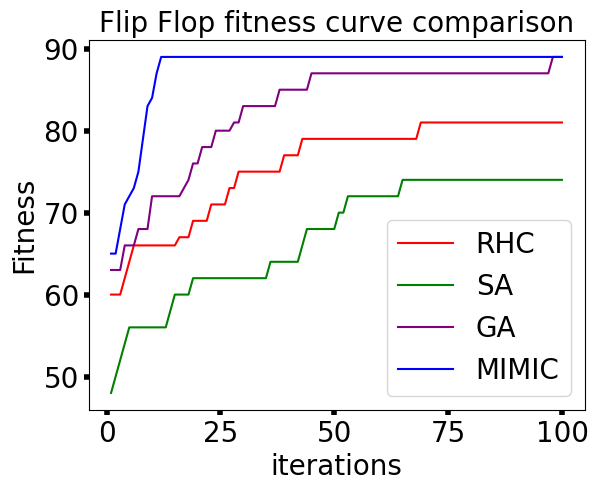

In [50]:

fitness=mlrose_hiive.FlipFlop()
problem=mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)
time_duration=[]
FF_rhc_start_time=time.time()
FF_rhc_best_state, FF_rhc_best_fitness, FF_rhc_fitness_curve=mlrose_hiive.random_hill_climb(problem, max_attempts=100, max_iters=100, curve=True, random_state=42, restarts=100)
FF_rhc_end_time=time.time()
FF_rhc_duration=FF_rhc_end_time-OM_rhc_start_time
FF_rhc_fitness_curve=FF_rhc_fitness_curve[:,0]
time_duration.append(FF_rhc_duration)

FF_sa_start_time=time.time()
FF_sa_best_state, FF_sa_best_fitness, FF_sa_fitness_curve=mlrose_hiive.simulated_annealing(problem, schedule=mlrose.GeomDecay(init_temp=10, decay=0.01,min_temp=0.01), max_attempts=100, max_iters=100, curve=True, random_state=42)
FF_sa_end_time=time.time()
FF_sa_duration=FF_sa_end_time-FF_sa_start_time
FF_sa_fitness_curve=FF_sa_fitness_curve[:,0]
time_duration.append(FF_sa_duration)

FF_ga_start_time=time.time()
FF_ga_best_state, FF_ga_best_fitness, FF_ga_fitness_curve=mlrose_hiive.genetic_alg(problem,  max_attempts=100, max_iters=100, curve=True, random_state=42, pop_size=50, mutation_prob=0.1)
FF_ga_end_time=time.time()
FF_ga_duration=FF_ga_end_time-FF_ga_start_time
FF_ga_fitness_curve=FF_ga_fitness_curve[:,0]
time_duration.append(FF_ga_duration)

FF_mimic_start_time=time.time()
FF_mimic_best_state, FF_mimic_best_fitness, FF_mimic_fitness_curve=mlrose_hiive.mimic(problem, max_attempts=100, max_iters=100, curve=True, random_state=42, pop_size=200)
FF_mimic_end_time=time.time()
FF_mimic_duration=FF_mimic_end_time-FF_mimic_start_time
FF_mimic_fitness_curve=FF_mimic_fitness_curve[:,0]
time_duration.append(FF_mimic_duration)

iterations=range(1,101)
plt.plot(iterations, FF_rhc_fitness_curve, color="red", label="RHC")
plt.plot(iterations, FF_sa_fitness_curve, color="Green", label="SA")
plt.plot(iterations, FF_ga_fitness_curve, color="Purple", label="GA")
plt.plot(iterations, FF_mimic_fitness_curve, color="Blue", label="MIMIC")
plt.legend(fontsize=20)
plt.title("Flip Flop fitness curve comparison",fontsize=20)
plt.xlabel("iterations", fontsize=20)
plt.ylabel("Fitness",fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.show()
    

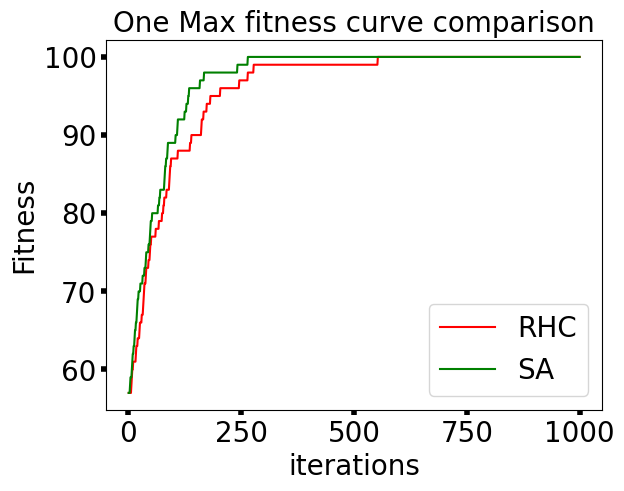

In [53]:
fitness=mlrose_hiive.OneMax()
problem=mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)
time_duration=[]
OM_rhc_start_time=time.time()
OM_rhc_best_state, OM_rhc_best_fitness, OM_rhc_fitness_curve=mlrose_hiive.random_hill_climb(problem, max_attempts=1000, max_iters=1000, curve=True, random_state=42, restarts=100)
OM_rhc_end_time=time.time()
OM_rhc_duration=OM_rhc_end_time-OM_rhc_start_time
OM_rhc_fitness_curve=OM_rhc_fitness_curve[:,0]
time_duration.append(OM_rhc_duration)

OM_sa_start_time=time.time()
OM_sa_best_state, OM_sa_best_fitness, OM_sa_fitness_curve=mlrose_hiive.simulated_annealing(problem, schedule=mlrose.GeomDecay(init_temp=10, decay=0.1,min_temp=0.001), max_attempts=1000, max_iters=1000, curve=True, random_state=42)
OM_sa_end_time=time.time()
OM_sa_duration=OM_sa_end_time-OM_sa_start_time
OM_sa_fitness_curve=OM_sa_fitness_curve[:,0]
time_duration.append(OM_sa_duration)

iterations=range(1,1001)
plt.plot(iterations, OM_rhc_fitness_curve, color="red", label="RHC")
plt.plot(iterations, OM_sa_fitness_curve, color="Green", label="SA")
# plt.plot(iterations, OM_ga_fitness_curve, color="Purple", label="GA")
# plt.plot(iterations, OM_mimic_fitness_curve, color="Blue", label="MIMIC")
plt.legend(fontsize=20)
plt.title("One Max fitness curve comparison",fontsize=20)
plt.xlabel("iterations", fontsize=20)
plt.ylabel("Fitness",fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.show()
